# BIS(BIOPROCESS ASSISTANT SOFTWARE)

## BIBLIOTECAS:

In [2]:
pip install lmfit

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from lmfit import Model
import matplotlib.pyplot as plt

## IMPORTANTO E TRABALHANDO COM OS DADOS:

### Importando arquivos de exemplo:

In [4]:
# Defina o caminho para o arquivo .xlsx
caminho_arquivo = '/home/ABTLUS/daniel23020/Documentos/4° Semestre/IP/Bioprocess-Assistant-Software-CNPEM-LNBR/dados_exemplo/GP_example_Ilum.xlsx'

dataset_exemplo = pd.read_excel(caminho_arquivo, header=None)

In [5]:
print(dataset_exemplo)

          0      1      2      3      4      5      6      7      8      9   \
0       0.00  0.318  0.212  0.244  0.198  0.203  0.224  0.192  0.166  0.137   
1      30.00  0.376  0.249  0.297  0.243  0.243  0.271  0.240  0.201  0.172   
2      60.00  0.407  0.269  0.327  0.263  0.265  0.287  0.257  0.219  0.184   
3      90.00  0.443  0.292  0.355  0.281  0.284  0.309  0.274  0.227  0.194   
4     120.00  0.484  0.315  0.384  0.312  0.314  0.333  0.295  0.247  0.213   
..       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
235  7050.25  8.612  7.796  8.544  7.376  8.168  7.365  7.304  7.099  8.047   
236  7080.25  8.578  7.799  8.607  7.416  8.158  7.359  7.325  7.098  8.040   
237  7110.25  8.576  7.821  8.594  7.458  8.179  7.431  7.351  7.127  8.076   
238  7140.25  8.627  7.811  8.652  7.467  8.227  7.439  7.353  7.165  8.021   
239  7170.25  8.623  7.843  8.518  7.450  8.173  7.425  7.342  7.160  8.068   

     ...      87     88      89     90     91     9

### Função: Tira média das triplicatas na horizontal e adiciona um nome a cada coluna.

In [6]:
def df_triplicatas(dataset):

    dataset_sem_triplicatas = pd.DataFrame(dataset.iloc[:,0]) # Reservando a primeira coluna do dataset, correspondente ao tempo. 

    dataset_sem_triplicatas.columns = ['Tempo(horas)'] + list(dataset_sem_triplicatas.columns[1:])  # Substitua 'Novo_Nome' pelo nome desejado

    # Divide os valores da primeira coluna por 60
    dataset_sem_triplicatas["Tempo(horas)"] = dataset_sem_triplicatas["Tempo(horas)"] / 60 #transformando o tempo de minutos para hora


    colunas = int((len(dataset.columns) - 1) / 3)

    letras_colunas = ["A","B","C","D","E","F","G","H",]

    letra = 0

    passo = 1

    for i in range(1, colunas + 1):
        
        colunas_para_media = dataset.iloc[:, (i*3 -2) : (i*3+1)]  # Substitua 0:3 pelos índices das colunas desejadas

        # Calcula a média das três colunas para cada linha
        media_colunas = colunas_para_media.mean(axis=1)


        # Cria um novo DataFrame e adiciona a coluna com as médias
        dataset_sem_triplicatas[f'Poço-{letras_colunas[letra]}({(passo*3-2)}-{(passo*3)})'] = media_colunas

        if (i % 4) == 0:
            letra += 1
        
        if passo == 4:
            passo = 1
        else:
            passo += 1

    return dataset_sem_triplicatas
    

## Criando Dicionário de Datasets com base nas colunas:

In [7]:
teste = df_triplicatas(dataset_exemplo)

In [20]:
teste

,Tempo(horas),Poço-A(1-3),Poço-A(4-6),Poço-A(7-9),Poço-A(10-12),Poço-B(1-3),Poço-B(4-6),Poço-B(7-9),Poço-B(10-12),Poço-C(1-3),...,Poço-F(7-9),Poço-F(10-12),Poço-G(1-3),Poço-G(4-6),Poço-G(7-9),Poço-G(10-12),Poço-H(1-3),Poço-H(4-6),Poço-H(7-9),Poço-H(10-12)
0,0.000000,0.258000,0.208333,0.165000,0.185667,0.207333,0.189000,0.146000,0.168667,0.176667,...,0.114000,0.124667,0.200333,0.170333,0.132000,0.172000,0.225000,0.194667,0.112000,0.060333
1,0.500000,0.307333,0.252333,0.204333,0.229000,0.260667,0.232667,0.182333,0.210667,0.226000,...,0.139000,0.156000,0.241667,0.211000,0.154000,0.207667,0.258333,0.230000,0.119000,0.055667
2,1.000000,0.334333,0.271667,0.220000,0.251667,0.281000,0.248000,0.196000,0.232000,0.249667,...,0.156000,0.177333,0.266333,0.229000,0.170667,0.232000,0.279333,0.250000,0.126667,0.055000
3,1.500000,0.363333,0.291333,0.231667,0.265667,0.304333,0.269333,0.210333,0.254000,0.280000,...,0.173667,0.197333,0.297000,0.247333,0.183333,0.248000,0.301000,0.273000,0.132667,0.056333
4,2.000000,0.394333,0.319667,0.251667,0.284000,0.331667,0.295333,0.232333,0.281667,0.308333,...,0.190667,0.220000,0.325000,0.271333,0.196667,0.269333,0.324000,0.294667,0.135000,0.056667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,117.504167,8.317333,7.636333,7.483333,8.803333,8.433667,7.857667,7.754667,7.634000,8.590000,...,8.592333,7.931667,9.822000,8.937000,5.705667,9.334000,10.086667,9.284667,4.064667,0.075000
236,118.004167,8.328000,7.644333,7.487667,8.809333,8.435333,7.827333,7.773333,7.645667,8.616667,...,8.614000,7.949333,9.865333,8.958000,5.719667,9.326333,10.125000,9.263667,4.088000,0.074000
237,118.504167,8.330333,7.689333,7.518000,8.837667,8.448000,7.844000,7.788333,7.647000,8.639333,...,8.639333,7.942667,9.916667,8.965667,5.713667,9.339333,10.132667,9.279667,4.132667,0.075000
238,119.004167,8.363333,7.711000,7.513000,8.828000,8.485333,7.900000,7.816000,7.660000,8.713333,...,8.704000,8.014000,9.967667,9.037000,5.791333,9.395667,10.148333,9.326000,4.241333,0.075333


In [8]:
def dici_datasets(dataset):

    primeira_coluna = dataset.columns[0]

    # Criando o dicionário com as colunas (exceto a primeira) e os respectivos datasets
    return {col: dataset[[primeira_coluna, col]] for col in dataset.columns[1:]}
    

In [9]:
dicionario_poços = dici_datasets(teste)

In [43]:
dicionario_poços

{'Poço-A(1-3)':      Tempo(horas)  Poço-A(1-3)
 0        0.000000     0.258000
 1        0.500000     0.307333
 2        1.000000     0.334333
 3        1.500000     0.363333
 4        2.000000     0.394333
 ..            ...          ...
 235    117.504167     8.317333
 236    118.004167     8.328000
 237    118.504167     8.330333
 238    119.004167     8.363333
 239    119.504167     8.328000
 
 [240 rows x 2 columns],
 'Poço-A(4-6)':      Tempo(horas)  Poço-A(4-6)
 0        0.000000     0.208333
 1        0.500000     0.252333
 2        1.000000     0.271667
 3        1.500000     0.291333
 4        2.000000     0.319667
 ..            ...          ...
 235    117.504167     7.636333
 236    118.004167     7.644333
 237    118.504167     7.689333
 238    119.004167     7.711000
 239    119.504167     7.682667
 
 [240 rows x 2 columns],
 'Poço-A(7-9)':      Tempo(horas)  Poço-A(7-9)
 0        0.000000     0.165000
 1        0.500000     0.204333
 2        1.000000     0.220000
 3   

In [10]:
poços = list(dicionario_poços.keys())

In [21]:
poços

['Poço-A(1-3)',
 'Poço-A(4-6)',
 'Poço-A(7-9)',
 'Poço-A(10-12)',
 'Poço-B(1-3)',
 'Poço-B(4-6)',
 'Poço-B(7-9)',
 'Poço-B(10-12)',
 'Poço-C(1-3)',
 'Poço-C(4-6)',
 'Poço-C(7-9)',
 'Poço-C(10-12)',
 'Poço-D(1-3)',
 'Poço-D(4-6)',
 'Poço-D(7-9)',
 'Poço-D(10-12)',
 'Poço-E(1-3)',
 'Poço-E(4-6)',
 'Poço-E(7-9)',
 'Poço-E(10-12)',
 'Poço-F(1-3)',
 'Poço-F(4-6)',
 'Poço-F(7-9)',
 'Poço-F(10-12)',
 'Poço-G(1-3)',
 'Poço-G(4-6)',
 'Poço-G(7-9)',
 'Poço-G(10-12)',
 'Poço-H(1-3)',
 'Poço-H(4-6)',
 'Poço-H(7-9)',
 'Poço-H(10-12)']

In [11]:
dados = input("Qual os poços que estavam suas amostras. (Ex: Poço-B(1-3))")

In [12]:
dicionario_poços[dados]

,Tempo(horas),Poço-B(1-3)
0,0.000000,0.207333
1,0.500000,0.260667
2,1.000000,0.281000
3,1.500000,0.304333
4,2.000000,0.331667
...,...,...
235,117.504167,8.433667
236,118.004167,8.435333
237,118.504167,8.448000
238,119.004167,8.485333


In [13]:
dicionario_poços[dados][dicionario_poços[dados].columns[1]]  # Pegando somente o valor da segunda coluna....

0      0.207333
1      0.260667
2      0.281000
3      0.304333
4      0.331667
         ...   
235    8.433667
236    8.435333
237    8.448000
238    8.485333
239    8.427000
Name: Poço-B(1-3), Length: 240, dtype: float64

## Modelagem Matemática

### Definindo Variáveis:

In [28]:
dados = input("Qual os poços que estavam suas amostras. (Ex: Poço-B(1-3))")

In [32]:
y = dicionario_poços[dados][dicionario_poços[dados].columns[1]] 
x = dicionario_poços[dados][dicionario_poços[dados].columns[0]] 

### Definindo 1° Modelo de Gompertz:

In [33]:
def gompertz(t, a, b, c):
    '''
    Calcula a função de Gompertz
    
    args:
    t (int) : Instante t de tempo. 
    a (float): Valor assintótico máximo.
    b (float): Parâmetro de deslocamento.
    c (float): Taxa de crescimento.

    return: Calculo da função de Gompertz
    '''
    return a * np.exp(-b * np.exp(-c * t))

modelo_gompertz = Model(gompertz)

print(f'Variável independente: {modelo_gompertz.independent_vars}')
print(f'Parâmetros do modelo: {modelo_gompertz.param_names}')

Variável independente: ['t']
Parâmetros do modelo: ['a', 'b', 'c']


In [34]:

params = modelo_gompertz.make_params(a=10, b=1, c=0.5)#Fornecendo parametros iniciais (Tem que ver como fazer isso com o usuário)
params['a'].min = 0  # a deve ser positivo
params['b'].min = 0  # b deve ser positivo
params['c'].min = 0  # c deve ser positivo 


resultado_fit = modelo_gompertz.fit(y, params, t=x)  #Fitando a função aos meus dados
print(resultado_fit.fit_report())


[[Model]]
    Model(gompertz)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 52
    # data points      = 240
    # variables        = 3
    chi-square         = 3.79806044
    reduced chi-square = 0.01602557
    Akaike info crit   = -989.075615
    Bayesian info crit = -978.633698
    R-squared          = 0.99752305
[[Variables]]
    a:  8.22853783 +/- 0.01479195 (0.18%) (init = 10)
    b:  3.30340417 +/- 0.04021356 (1.22%) (init = 1)
    c:  0.05910526 +/- 5.1407e-04 (0.87%) (init = 0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = +0.8700
    C(a, c) = -0.6344
    C(a, b) = -0.3750


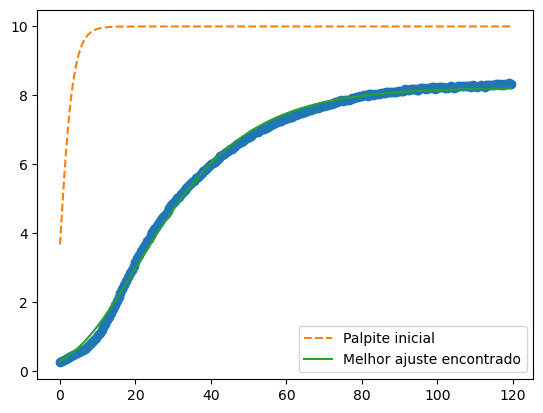

In [35]:
plt.plot(x, y, 'o')
plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', label='Melhor ajuste encontrado')
plt.legend()
plt.show()

### Definindo 2° Modelo de Gompertz:

In [38]:
def gompertz_2(t, Nmax, k, tlag):
    '''
    Calcula a função de Gompertz para modelar o crescimento microbiano.

    Args:
    t (float): Tempo em unidades de horas.
    Nmax (float): Valor assintótico máximo da população de micro-organismos. Representa a capacidade máxima de crescimento da cultura.
    k (float): Taxa de crescimento específica. Determina a rapidez com que a população de micro-organismos cresce após o período de lag.
    tlag (float): Tempo de lag ou atraso antes do início do crescimento exponencial. Representa o tempo necessário para a adaptação inicial da população.

    Returns:
    float: Resultado da função de Gompertz, o valor estimado da população de micro-organismos para cada instante de tempo.
    '''
    return Nmax * np.exp(-np.exp(-k * (t - tlag)))

In [76]:
modelo_gompertz = Model(gompertz_2)

params = modelo_gompertz.make_params(Nmax=10, k=0.5, tlag=1)
params['Nmax'].min = 0  # Limite mínimo para Nmax
params['k'].min = 0.01  # Limite mínimo para k
params['tlag'].min = 0  # Limite mínimo para tlag


#desvio_padrao_nmax = resultado_fit.params["Nmax"].stderr

residuos = y - resultado_fit.best_fit

# Calcula o desvio padrão dos resíduos
desvio_padrao = np.std(residuos)


resultado_fit = modelo_gompertz.fit(y, params, t=x)
print(resultado_fit.fit_report())

[[Model]]
    Model(gompertz_2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 240
    # variables        = 3
    chi-square         = 4.03433556
    reduced chi-square = 0.01702251
    Akaike info crit   = -974.591353
    Bayesian info crit = -964.149436
    R-squared          = 0.99691054
[[Variables]]
    Nmax:  7.51482262 +/- 0.01540596 (0.21%) (init = 10)
    k:     0.05869777 +/- 5.7563e-04 (0.98%) (init = 0.5)
    tlag:  20.7107794 +/- 0.11516649 (0.56%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(Nmax, k)    = -0.6386
    C(Nmax, tlag) = +0.3442


In [77]:
print(desvio_padrao)

0.1293052533645194


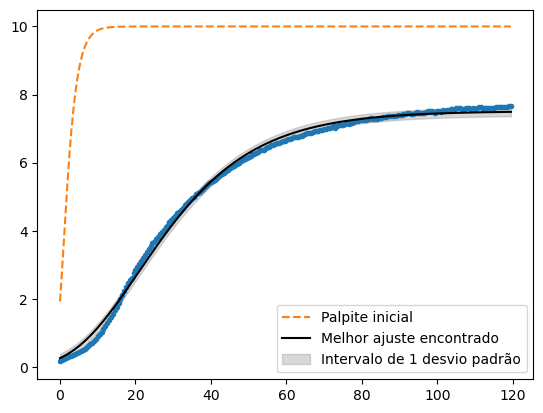

In [78]:
plt.plot(x, y, '.')
plt.plot(x, resultado_fit.init_fit, '--', label='Palpite inicial')
plt.plot(x, resultado_fit.best_fit, '-', color='black', label='Melhor ajuste encontrado')


plt.fill_between(x, resultado_fit.best_fit - desvio_padrao, resultado_fit.best_fit + desvio_padrao,
                    color='gray', alpha=0.3, label='Intervalo de 1 desvio padrão')
plt.legend()
plt.show()

## Plotando mais de um gráfico por vez

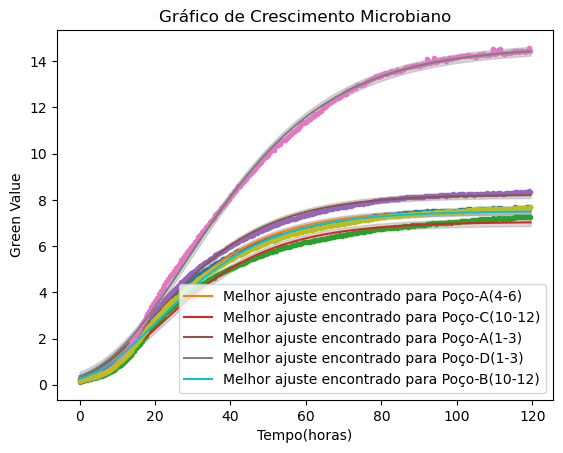

           Poços  STD_da_Curva       Nmax         K      T-lag
0    Poço-A(4-6)      0.127823   7.529753  0.060764  19.951993
1  Poço-C(10-12)      0.158228   7.051594  0.057643  21.192406
2    Poço-A(1-3)      0.125546   8.228539  0.059105  20.217373
3    Poço-D(1-3)      0.189859  14.651819  0.045889  28.402423
4  Poço-B(10-12)      0.129305   7.514823  0.058698  20.710779


In [85]:
amostras = ["Poço-A(4-6)","Poço-C(10-12)","Poço-A(1-3)","Poço-D(1-3)","Poço-B(10-12)"]  # Definindo os poços que serão usados e comparados. 






modelo_gompertz = Model(gompertz_2) # Definindo qual modelo será usado. 

params = modelo_gompertz.make_params(Nmax=10, k=0.5, tlag=1) #Definindo Parametros iniciais do modelo
params['Nmax'].min = 0  # Limite mínimo para Nmax
params['k'].min = 0.01  # Limite mínimo para k
params['tlag'].min = 0  # Limite mínimo para tlag


# Definindo o dicinionário que vai receber parametros otimizados e que posteriormente irão para uma tabela.
tabela = {
    'Poços': [],
    "STD_da_Curva": [],
    'Nmax': [],
    'K': [],
    'T-lag': []
}


for i in amostras: #Itera cada uma das amostras selecionadas
    
    x = dicionario_poços[i][dicionario_poços[i].columns[0]]
    y = dicionario_poços[i][dicionario_poços[i].columns[1]]

    resultado_fit = modelo_gompertz.fit(y, params, t=x)



    residuos = y - resultado_fit.best_fit

    # Calcula o desvio padrão dos resíduos
    desvio_padrao = np.std(residuos)


    #print(resultado_fit.fit_report())

    # Adiciona os parametros otimizados para cada amostra no dicionario definido anteriormente. 
    tabela['Poços'].append(i)
    tabela['STD_da_Curva'].append(desvio_padrao)
    tabela['Nmax'].append(resultado_fit.params["Nmax"].value)
    tabela['K'].append(resultado_fit.params["k"].value)
    tabela["T-lag"].append(resultado_fit.params["tlag"].value)




    # Criar o gráfico de pontos
    plt.plot(x, y, '.')

    # Plotar a linha do melhor ajuste
    plt.plot(x, resultado_fit.best_fit, '-', label=f"Melhor ajuste encontrado para {i}")


    plt.fill_between(x, resultado_fit.best_fit - desvio_padrao, resultado_fit.best_fit + desvio_padrao,
                    color='gray', alpha=0.3)

    # Adicionar legenda
    plt.legend()

    

#plt.figure(figsize=(10, 6))  # Aumenta o tamanho do gráfico (10 de largura e 6 de altura)

# Adicionar títulos e legendas aos eixos
plt.title("Gráfico de Crescimento Microbiano")
plt.xlabel("Tempo(horas)")  # Substitua pelo nome desejado
plt.ylabel("Green Value")  # Substitua pelo nome desejado  


plt.show()

parametros = pd.DataFrame(tabela)
print(parametros)


In [44]:
resultado_fit.params['Nmax'].stderr


0.01540595917981946

In [81]:
def teste():

    return 10, 15

In [84]:
x = teste()[1]

# Referencias:

[1] https://en.wikipedia.org/wiki/Gompertz_function  
[2] Notebooks sobre modelagem de dados disponibilizados pelos professores Daniel Roberto Cassar e James Moraes de Almeida 